In [5]:
import os
import json
import nltk
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

nltk.download('punkt')

In [6]:
def analyse_train_data(file_path: str) -> dict:
    counter = Counter()
    total_tokens = 0
    total_sentences = 0
    total_word_length = 0

    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        sentences = sent_tokenize(text)
        total_sentences += len(sentences)
        
        for sentence in sentences:
            tokens = word_tokenize(sentence)
            total_tokens += len(tokens)
            total_word_length += sum(len(token) for token in tokens)
            counter.update(tokens)

    total_types = len(counter)
    total_words = sum(counter.values())
    average_words_per_sentence = total_words / total_sentences
    average_word_length = total_word_length / total_words

    words = list(counter.elements())
    tagged = pos_tag(words)
    pos_counter = Counter(tag for word, tag in tagged)
    most_common_pos = pos_counter.most_common(10)

    return {
        'total_tokens': total_tokens,
        'total_types': total_types,
        'total_words': total_words,
        'average_words_per_sentence': average_words_per_sentence,
        'average_word_length': average_word_length,
        'most_common_pos': most_common_pos,
        'word_frequencies': counter,
    }

In [7]:
RESULTS_PATH: str = "results"
os.makedirs(RESULTS_PATH) if not os.path.exists(RESULTS_PATH) else None

## BABYLM_10M dataset

In [19]:
EXPERIMENT: str = "babylm_10M.json"
file_paths: list[str] = [
    "datasets/babylm_10M/aochildes.train",
    "datasets/babylm_10M/bnc_spoken.train",
    "datasets/babylm_10M/cbt.train",
    "datasets/babylm_10M/children_stories.train",
    "datasets/babylm_10M/gutenberg.train",
    "datasets/babylm_10M/open_subtitles.train",
    "datasets/babylm_10M/qed.train",
    "datasets/babylm_10M/simple_wikipedia.train",
    "datasets/babylm_10M/switchboard.train",
    "datasets/babylm_10M/wikipedia.train",
]

experiment_results_target_path: str = f"{RESULTS_PATH}/{EXPERIMENT}"
results: list[dict] = []
for file_path in file_paths:
    print(f"Processing [{file_path}] ...")
    result: dict = analyse_train_data(file_path)
    results.append(result)
    
    # store last computed results
    with open(experiment_results_target_path, "w") as file:
        print(f"Saving last results to [{experiment_results_target_path}]")
        file.write(json.dumps(results))

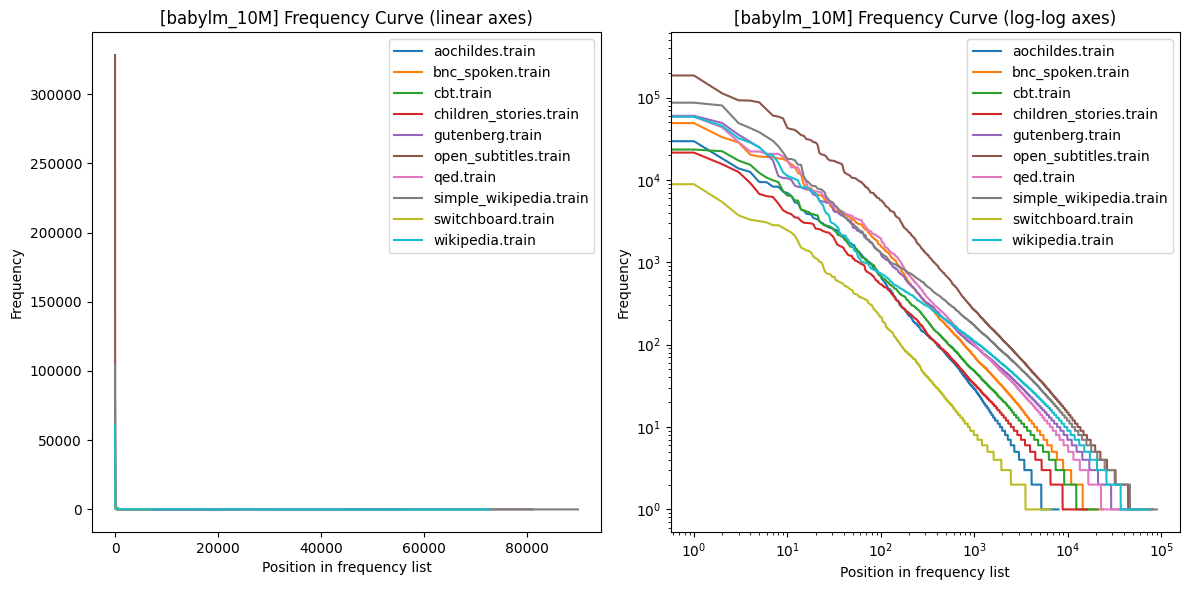

In [13]:
# laod last computed results
with open(experiment_results_target_path, "r") as file:
    loaded_data = json.load(file)

plt.figure(figsize=(12, 6))
for result, file_path in zip(loaded_data, file_paths):
    frequencies = sorted(list(result['word_frequencies'].values()), reverse=True)
    
    label = os.path.basename(file_path)

    plt.subplot(1, 2, 1)
    plt.plot(frequencies, label=label)
    plt.title('[babylm_10M] Frequency Curve (linear axes)')
    plt.xlabel('Position in frequency list')
    plt.ylabel('Frequency')
    plt.legend()

    # Plot frequency curve with log-log axes
    plt.subplot(1, 2, 2)
    plt.loglog(frequencies, label=label)
    plt.title('[babylm_10M] Frequency Curve (log-log axes)')
    plt.xlabel('Position in frequency list')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

## BABYLM_100M dataset

In [17]:
EXPERIMENT: str = "babylm_100M.json"
file_paths: list[str] = [
    "datasets/babylm_100M/aochildes.train",
    "datasets/babylm_100M/bnc_spoken.train",
    "datasets/babylm_100M/cbt.train",
    "datasets/babylm_100M/children_stories.train",
    "datasets/babylm_100M/gutenberg.train",
    "datasets/babylm_100M/open_subtitles.train",
    "datasets/babylm_100M/qed.train",
    "datasets/babylm_100M/simple_wikipedia.train",
    "datasets/babylm_100M/switchboard.train",
    "datasets/babylm_100M/wikipedia.train",
]

experiment_results_target_path: str = f"{RESULTS_PATH}/{EXPERIMENT}"
results: list[dict] = []
for file_path in file_paths:
    print(f"Processing [{file_path}] ...")
    result: dict = analyse_train_data(file_path)
    results.append(result)
    
    # store last computed results
    with open(experiment_results_target_path, "w") as file:
        print(f"Saving last results to [{experiment_results_target_path}]")
        file.write(json.dumps(results))

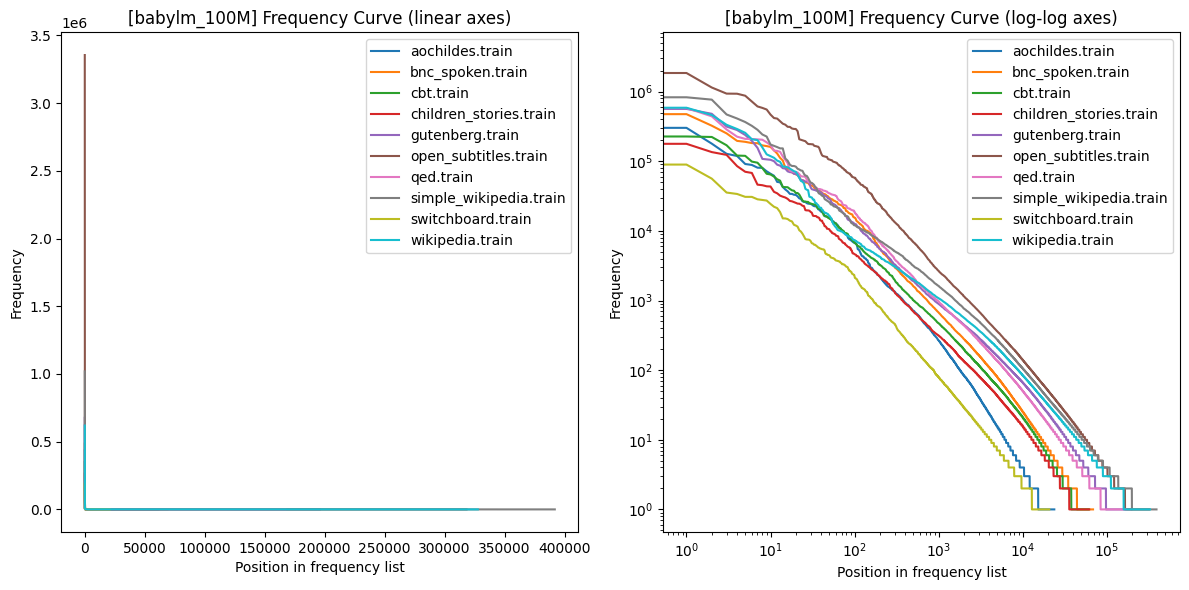

In [18]:
# load last computed results
with open(experiment_results_target_path, "r") as file:
    loaded_data = json.load(file)

plt.figure(figsize=(12, 6))
for result, file_path in zip(loaded_data, file_paths):
    frequencies = sorted(list(result['word_frequencies'].values()), reverse=True)
    
    label = os.path.basename(file_path)

    plt.subplot(1, 2, 1)
    plt.plot(frequencies, label=label)
    plt.title('[babylm_100M] Frequency Curve (linear axes)')
    plt.xlabel('Position in frequency list')
    plt.ylabel('Frequency')
    plt.legend()

    # Plot frequency curve with log-log axes
    plt.subplot(1, 2, 2)
    plt.loglog(frequencies, label=label)
    plt.title('[babylm_100M] Frequency Curve (log-log axes)')
    plt.xlabel('Position in frequency list')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()